## Observations and Insights

## Dependencies and starter code

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
combined_data=mouse_metadata.merge(study_results, on="Mouse ID", how="outer")
combined_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
regimen_group=combined_data.groupby(["Drug Regimen"])
tumor_mean=regimen_group["Tumor Volume (mm3)"].mean()
tumor_median=regimen_group["Tumor Volume (mm3)"].median()
tumor_variance=regimen_group["Tumor Volume (mm3)"].var()
tumor_std=regimen_group["Tumor Volume (mm3)"].std()
tumor_SEM=regimen_group["Tumor Volume (mm3)"].sem()

stat_summary=pd.DataFrame({"Mean":tumor_mean,
                           "Median":tumor_median,
                           "Variance":tumor_variance,
                           "Standard Deviation":tumor_std,
                           "SEM":tumor_SEM})
stat_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar plots

In [6]:
regimen_count=regimen_group["Mouse ID"].count()
regimen_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Treatment Regimen')

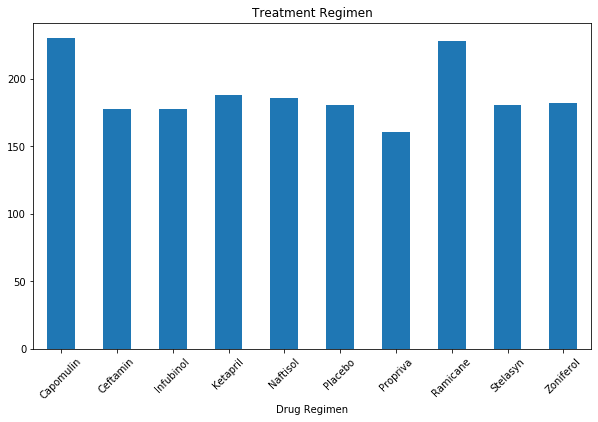

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count.plot(kind="bar",figsize=(10,6),rot=45)
plt.title("Treatment Regimen")

In [ ]:
# %matplotlib notebook

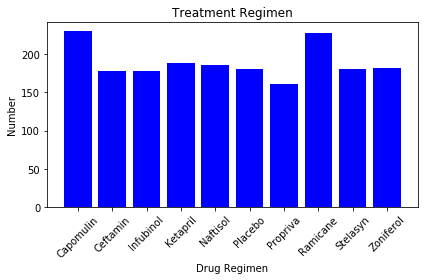

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=regimen_count.index.tolist()
x_axis
# x_axis=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
#         "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.bar(x_axis,regimen_count,color="blue",align="center")
plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number")
plt.xticks(range(len(x_axis)), rotation="45")
plt.tight_layout()
plt.show()

In [ ]:
# plt.xticks(range(len(x_axis)), rotation="45")
# plt.tight_layout()

## Pie plots

In [9]:
gender_count=combined_data.groupby("Sex")["Mouse ID"].nunique()
gender_count

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

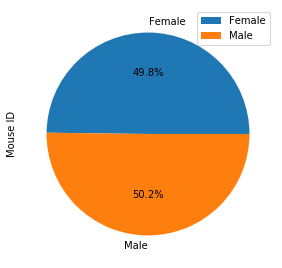

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
gender_count.plot(kind='pie', autopct='%1.1f%%',legend = True)

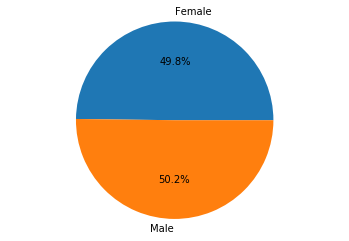

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female','Male'
sizes = [124, 125]
explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  

plt.show()

## Quartiles, outliers and boxplots

In [27]:
combined_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [86]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# Based on the statistica summary above, select the small var and std, 4 of the most promising treatment regimens
# Capomulin,Ramicane,Ceftamin,Infubinol

four_regimens=combined_data.loc[combined_data["Drug Regimen"].isin(["Capomulin","Ramicane","Ceftamin","Infubinol"])]
maxtimepoint=four_regimens.loc[four_regimens["Timepoint"]==45]

regimens_finaltumor=maxtimepoint[["Drug Regimen","Tumor Volume (mm3)"]]
regimens_finaltumor.head(5)


,Drug Regimen,Tumor Volume (mm3)
9,Ramicane,22.050126
19,Capomulin,23.343598
29,Capomulin,28.484033
39,Capomulin,28.430964
49,Ramicane,29.128472


In [71]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = regimens_finaltumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor is: {lowerq}")
print(f"The upper quartile of final tumor is: {upperq}")
print(f"The interquartile range of final tumor is: {iqr}")

The lower quartile of final tumor is: 33.48002734
The upper quartile of final tumor is: 62.14221369
The interquartile range of final tumor is: 28.66218635


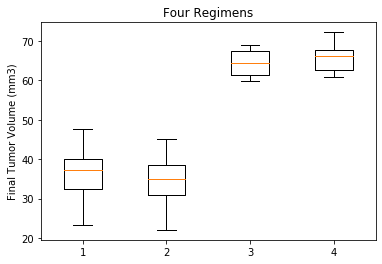

[Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Ceftamin'),
 Text(4, 0, 'Infubinol')]

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Capomulin_finaltumor=regimens_finaltumor.loc[regimens_finaltumor["Drug Regimen"]=="Capomulin",["Tumor Volume (mm3)"]]
Ramicane_finaltumor=regimens_finaltumor.loc[regimens_finaltumor["Drug Regimen"]=="Ramicane",["Tumor Volume (mm3)"]]
Ceftamin_finaltumor=regimens_finaltumor.loc[regimens_finaltumor["Drug Regimen"]=="Ceftamin",["Tumor Volume (mm3)"]]
Infubinol_finaltumor=regimens_finaltumor.loc[regimens_finaltumor["Drug Regimen"]=="Infubinol",["Tumor Volume (mm3)"]]

array_Capomulin=Capomulin_finaltumor.to_numpy()
array_Ramicane=Ramicane_finaltumor.to_numpy()
array_Ceftamin=Ceftamin_finaltumor.to_numpy()
array_Infubinol=Infubinol_finaltumor.to_numpy()


regimens=[array_Capomulin,array_Ramicane,array_Ceftamin,array_Infubinol]

fig1, ax1 = plt.subplots()
ax1.set_title('Four Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(regimens)
plt.show()

ax1.set_xticklabels(["Capomulin","Ramicane","Ceftamin","Infubinol"])


## Line and scatter plots

In [12]:
combined_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_with_Capomulin=combined_data.set_index("Drug Regimen")
Capomulin=mouse_with_Capomulin.loc["Capomulin",:]
Capomulin_s185=Capomulin.loc[Capomulin["Mouse ID"]=="s185",["Timepoint","Tumor Volume (mm3)"]]
Capomulin_s185_line=Capomulin_s185.set_index("Timepoint")

Text(0.5, 1.0, 'Mouse ID is s185, Drug Regimen is Capomulin')

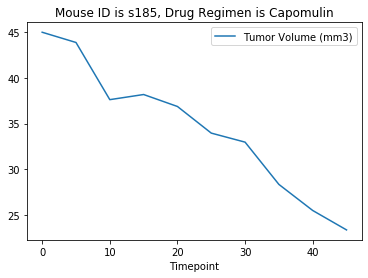

In [14]:
Capomulin_s185_line.plot(label="Capomulin_s185")
plt.title("Mouse ID is s185, Drug Regimen is Capomulin")

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin.head(5)
avg_tumor_volume=Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_volume
mouseid_grouped=Capomulin[["Mouse ID","Weight (g)"]].drop_duplicates()
mouse_weight=mouseid_grouped.set_index("Mouse ID")

In [16]:
Capomulin.head(5)
avg_tumor_volume=Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
df_avg_tumor_volume=avg_tumor_volume.to_frame()

In [17]:
weight_avgtumor=mouse_weight.merge(df_avg_tumor_volume,on="Mouse ID")
weight_avgtumor.head(5)

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
s185,17,34.559143
x401,15,36.182040
m601,17,34.847470
f966,17,36.505973
u364,17,39.887495


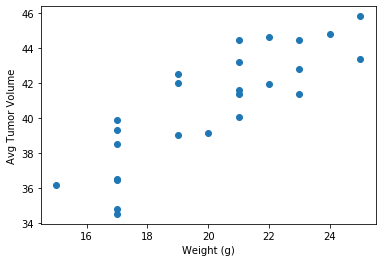

In [20]:
weight=weight_avgtumor["Weight (g)"]
avgtumor=weight_avgtumor["Tumor Volume (mm3)"]
plt.scatter(weight,avgtumor)
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume')
plt.show()

In [21]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
correlation = st.pearsonr(weight,avgtumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


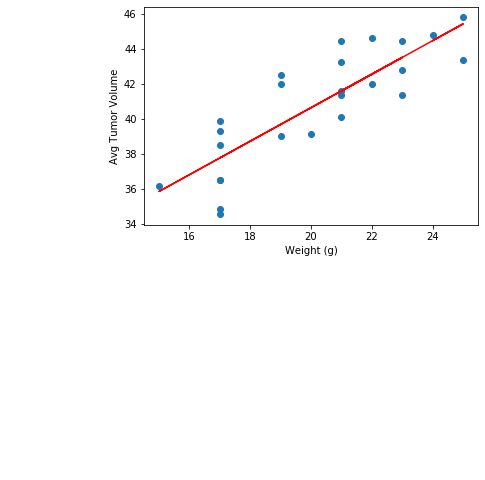

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,avgtumor)
regress_values= weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,avgtumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume')
plt.show()